# Training Data - Linear Regression

**Overview of Implementation**
1. <a href="#section1">Data Cleaning</a>
2. <a href="#section2">Data Exploration</a>
3. <a href="#section3">Data Imputation</a>
4. <a href="#section4">Linear Regression</a>

## <a id='section1'>1. Data Cleaning</a>
Import data & explore statistics

In [1]:
library(data.table)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
# Import train data using data.table fread function
wind.dt <- fread("../data/train_data.csv", stringsAsFactors = T) 

cat("Number of NA values: ", sum(is.na(wind.dt)))
colnames(wind.dt)
summary(wind.dt)

Number of NA values:  20579

[1] "tracking_id"                    "datetime"                      
 [3] "wind_speed(m/s)"                "atmospheric_temperature(Â°C)"  
 [5] "shaft_temperature(Â°C)"         "blades_angle(Â°)"              
 [7] "gearbox_temperature(Â°C)"       "engine_temperature(Â°C)"       
 [9] "motor_torque(N-m)"              "generator_temperature(Â°C)"    
[11] "atmospheric_pressure(Pascal)"   "area_temperature(Â°C)"         
[13] "windmill_body_temperature(Â°C)" "wind_direction(Â°)"            
[15] "resistance(ohm)"                "rotor_torque(N-m)"             
[17] "turbine_status"                 "cloud_level"                   
[19] "blade_length(m)"                "blade_breadth(m)"              
[21] "windmill_height(m)"             "windmill_generated_power(kW/h)"

   tracking_id                   datetime     wind_speed(m/s)  
 WM_1    :    1   2018-10-28 20:53:20:    1   Min.   :-496.21  
 WM_10   :    1   2018-10-28 21:03:20:    1   1st Qu.:  20.88  
 WM_1000 :    1   2018-10-28 21:33:20:    1   Median :  93.30  
 WM_10000:    1   2018-10-28 21:43:20:    1   Mean   :  69.04  
 WM_10001:    1   2018-10-28 21:53:20:    1   3rd Qu.:  95.27  
 WM_10002:    1   2018-10-28 22:03:20:    1   Max.   : 601.46  
 (Other) :28194   (Other)            :28194   NA's   :273      
 atmospheric_temperature(Â°C) shaft_temperature(Â°C) blades_angle(Â°)   
 Min.   :-99.000              Min.   :-99.00         Min.   :-146.2595  
 1st Qu.:  7.949              1st Qu.: 41.63         1st Qu.:  -1.1977  
 Median : 16.102              Median : 43.69         Median :  -0.4956  
 Mean   :  0.384              Mean   : 40.09         Mean   :  -9.6540  
 3rd Qu.: 23.687              3rd Qu.: 45.67         3rd Qu.:   5.4950  
 Max.   : 80.217              Max.   :169.82      

In [3]:
# Get rid of brackets and units in columns
remove_brackets <- function(x) {  
  gsub("\\(.*?\\)", "", x)
  }
colnames(wind.dt) <- sapply(colnames(wind.dt), remove_brackets)
colnames(wind.dt)

[1] "tracking_id"               "datetime"                 
 [3] "wind_speed"                "atmospheric_temperature"  
 [5] "shaft_temperature"         "blades_angle"             
 [7] "gearbox_temperature"       "engine_temperature"       
 [9] "motor_torque"              "generator_temperature"    
[11] "atmospheric_pressure"      "area_temperature"         
[13] "windmill_body_temperature" "wind_direction"           
[15] "resistance"                "rotor_torque"             
[17] "turbine_status"            "cloud_level"              
[19] "blade_length"              "blade_breadth"            
[21] "windmill_height"           "windmill_generated_power"

In [4]:
# Datetime Utils
# Datetime column is in object format. It should be converted into datetime format

get_year <- function(x) {  
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$year + 1900 # based on 1990
}
get_month <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$mon + 1 # 0 index
}
get_mday <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$mday
}
get_wday <- function(x){
  # The wday component of a POSIXlt object is the numeric weekday (0-6 starting on Sunday).
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$wday
}
get_hour <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$hour
}
get_min <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$min
}
get_sec <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$sec
}

class(wind.dt$datetime)

[1] "factor"

In [5]:
wind.dt$year <- unlist(lapply(wind.dt$datetime, get_year))
wind.dt$month <- unlist(lapply(wind.dt$datetime, get_month))
wind.dt$mday <- unlist(lapply(wind.dt$datetime, get_mday))
wind.dt$wday <- unlist(lapply(wind.dt$datetime, get_wday))
wind.dt$hour <- unlist(lapply(wind.dt$datetime, get_hour))
wind.dt$min <- unlist(lapply(wind.dt$datetime, get_min))
wind.dt$sec <- unlist(lapply(wind.dt$datetime, get_sec))

head(wind.dt)

tracking_id,datetime,wind_speed,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,blade_breadth,windmill_height,windmill_generated_power,year,month,mday,wday,hour,min,sec
WM_33725,2019-08-04 14:33:20,94.82002,-99.00000,41.72302,-0.9034229,82.41057,42.52302,2563.1245,76.66556,...,0.3140648,24.28169,6.766521,2019,8,4,0,14,33,20
WM_698,2018-11-05 10:13:20,241.83273,27.76478,-99.00000,-99.0000000,44.10492,46.25887,2372.3841,78.12980,...,0.4484944,27.26214,5.966275,2018,11,5,1,10,13,20
WM_39146,2019-09-14 14:03:20,95.48472,NA,41.85547,12.6527635,42.32210,42.87855,1657.1696,67.65447,...,0.3023210,27.36613,2.874342,2019,9,14,6,14,3,20
WM_6757,2018-12-25 15:33:20,238.81942,-99.00000,45.44391,15.1153228,44.75964,47.28210,2888.1341,95.38997,...,0.3671399,24.28777,14.851089,2018,12,25,2,15,33,20
WM_21521,2019-05-04 03:13:20,10.72289,NA,41.98118,1.7156961,-17.61646,43.46985,781.6954,37.42307,...,0.4533737,27.97165,3.519074,2019,5,4,6,3,13,20
WM_17873,2019-03-22 21:03:20,93.76997,30.32623,17.97062,-99.0000000,43.81643,40.81579,2119.3517,72.34513,...,0.3956420,24.67329,4.945780,2019,3,22,5,21,3,20


In [6]:
# Convert necessary features to factor
wind.dt$year = as.factor(wind.dt$year)
wind.dt$month = as.factor(wind.dt$month)
wind.dt$mday = as.factor(wind.dt$mday)
wind.dt$wday = as.factor(wind.dt$wday)

In [7]:
# drop column tracking_id and datetime
wind.dt[,tracking_id:=NULL]
wind.dt[,datetime:=NULL]
wind.dt[,sec:=NULL]
wind.dt[,min:=NULL]
# wind.dt[,mday:=NULL]
# wind.dt[,wday:=NULL]
# wind.dt[,year:=NULL]

colnames(wind.dt)
ncol(wind.dt)

summary(wind.dt)

[1] "wind_speed"                "atmospheric_temperature"  
 [3] "shaft_temperature"         "blades_angle"             
 [5] "gearbox_temperature"       "engine_temperature"       
 [7] "motor_torque"              "generator_temperature"    
 [9] "atmospheric_pressure"      "area_temperature"         
[11] "windmill_body_temperature" "wind_direction"           
[13] "resistance"                "rotor_torque"             
[15] "turbine_status"            "cloud_level"              
[17] "blade_length"              "blade_breadth"            
[19] "windmill_height"           "windmill_generated_power" 
[21] "year"                      "month"                    
[23] "mday"                      "wday"                     
[25] "hour"

[1] 25

   wind_speed      atmospheric_temperature shaft_temperature
 Min.   :-496.21   Min.   :-99.000         Min.   :-99.00   
 1st Qu.:  20.88   1st Qu.:  7.949         1st Qu.: 41.63   
 Median :  93.30   Median : 16.102         Median : 43.69   
 Mean   :  69.04   Mean   :  0.384         Mean   : 40.09   
 3rd Qu.:  95.27   3rd Qu.: 23.687         3rd Qu.: 45.67   
 Max.   : 601.46   Max.   : 80.217         Max.   :169.82   
 NA's   :273       NA's   :3450            NA's   :2        
  blades_angle       gearbox_temperature engine_temperature  motor_torque   
 Min.   :-146.2595   Min.   :-244.97     Min.   : 3.167     Min.   : 500.0  
 1st Qu.:  -1.1977   1st Qu.:  40.56     1st Qu.:41.911     1st Qu.: 870.3  
 Median :  -0.4956   Median :  43.22     Median :43.525     Median :2031.8  
 Mean   :  -9.6540   Mean   :  41.03     Mean   :42.614     Mean   :1710.8  
 3rd Qu.:   5.4950   3rd Qu.:  45.88     3rd Qu.:45.174     3rd Qu.:2462.6  
 Max.   : 165.9321   Max.   : 999.00     Max.   :5

In [8]:
# Take absolute value of wind_speed
wind.dt$wind_speed = abs(wind.dt$wind_speed)

In [9]:
summary(wind.dt)

   wind_speed      atmospheric_temperature shaft_temperature
 Min.   :  1.768   Min.   :-99.000         Min.   :-99.00   
 1st Qu.: 34.136   1st Qu.:  7.949         1st Qu.: 41.63   
 Median : 93.625   Median : 16.102         Median : 43.69   
 Mean   : 83.843   Mean   :  0.384         Mean   : 40.09   
 3rd Qu.: 95.612   3rd Qu.: 23.687         3rd Qu.: 45.67   
 Max.   :601.456   Max.   : 80.217         Max.   :169.82   
 NA's   :273       NA's   :3450            NA's   :2        
  blades_angle       gearbox_temperature engine_temperature  motor_torque   
 Min.   :-146.2595   Min.   :-244.97     Min.   : 3.167     Min.   : 500.0  
 1st Qu.:  -1.1977   1st Qu.:  40.56     1st Qu.:41.911     1st Qu.: 870.3  
 Median :  -0.4956   Median :  43.22     Median :43.525     Median :2031.8  
 Mean   :  -9.6540   Mean   :  41.03     Mean   :42.614     Mean   :1710.8  
 3rd Qu.:   5.4950   3rd Qu.:  45.88     3rd Qu.:45.174     3rd Qu.:2462.6  
 Max.   : 165.9321   Max.   : 999.00     Max.   :5

In [10]:
# Split into train and test set
library(caTools)

set.seed(2021)
train <- sample.split(Y=wind.dt$windmill_generated_power, SplitRatio=0.7)
trainset<- subset(wind.dt, train==T)
testset<- subset(wind.dt, train==F)
paste("number of rows of trainset: ",nrow(trainset))
paste("proportion of trainset: ", nrow(trainset)/nrow(wind.dt))
paste("number of rows of testset: ",nrow(testset))
paste("proportion of testset: ", nrow(testset)/nrow(wind.dt))

[1] "number of rows of trainset:  19740"

[1] "proportion of trainset:  0.7"

[1] "number of rows of testset:  8460"

[1] "proportion of testset:  0.3"

## <a id='section2'>2. Data Exploration</a>

In [11]:
# NA Analysis and Handling
library(naniar)
library(VIM)

Warning message:
"package 'naniar' was built under R version 3.6.3"Warning message:
"package 'VIM' was built under R version 3.6.3"Loading required package: colorspace
Loading required package: grid
VIM is ready to use.

Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues

Attaching package: 'VIM'

The following object is masked from 'package:datasets':

    sleep



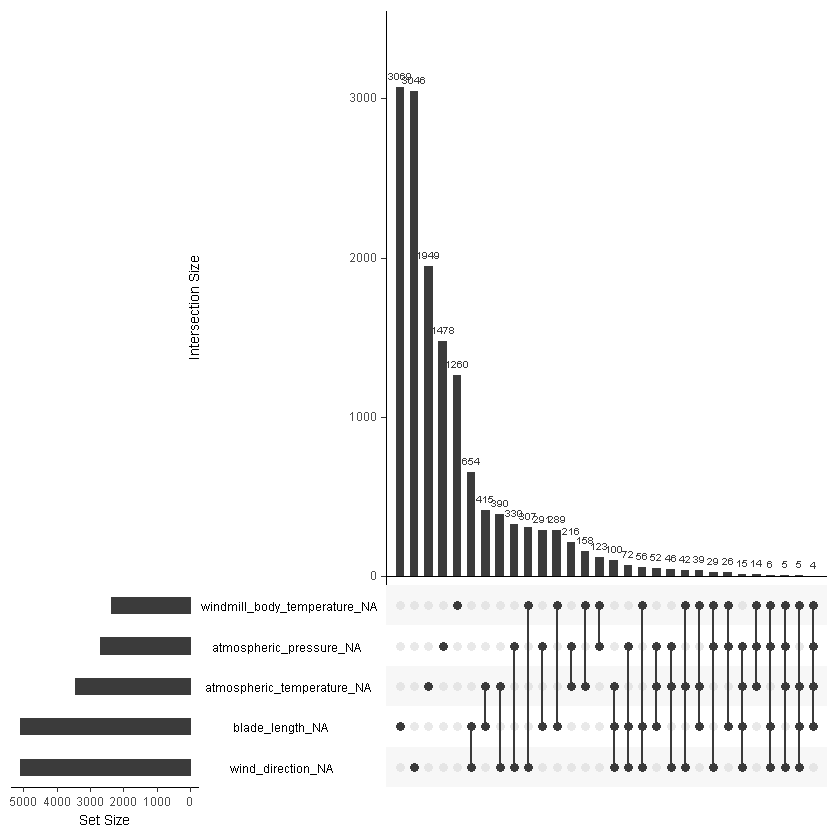

In [12]:
gg_miss_upset(wind.dt) # interesting overview of NA

Warning message in plot.aggr(res, ...):
"not enough vertical space to display frequencies (too many combinations)"


 Variables sorted by number of missings: 
                  Variable        Count
            wind_direction 1.809574e-01
              blade_length 1.806028e-01
   atmospheric_temperature 1.223404e-01
      atmospheric_pressure 9.599291e-02
 windmill_body_temperature 8.379433e-02
              rotor_torque 2.028369e-02
           windmill_height 1.925532e-02
                wind_speed 9.680851e-03
              blades_angle 7.659574e-03
  windmill_generated_power 7.340426e-03
              motor_torque 8.510638e-04
        engine_temperature 4.255319e-04
     generator_temperature 4.255319e-04
         shaft_temperature 7.092199e-05
       gearbox_temperature 3.546099e-05
                resistance 3.546099e-05
          area_temperature 0.000000e+00
            turbine_status 0.000000e+00
               cloud_level 0.000000e+00
             blade_breadth 0.000000e+00
                      year 0.000000e+00
                     month 0.000000e+00
                      mday 0.000000e+

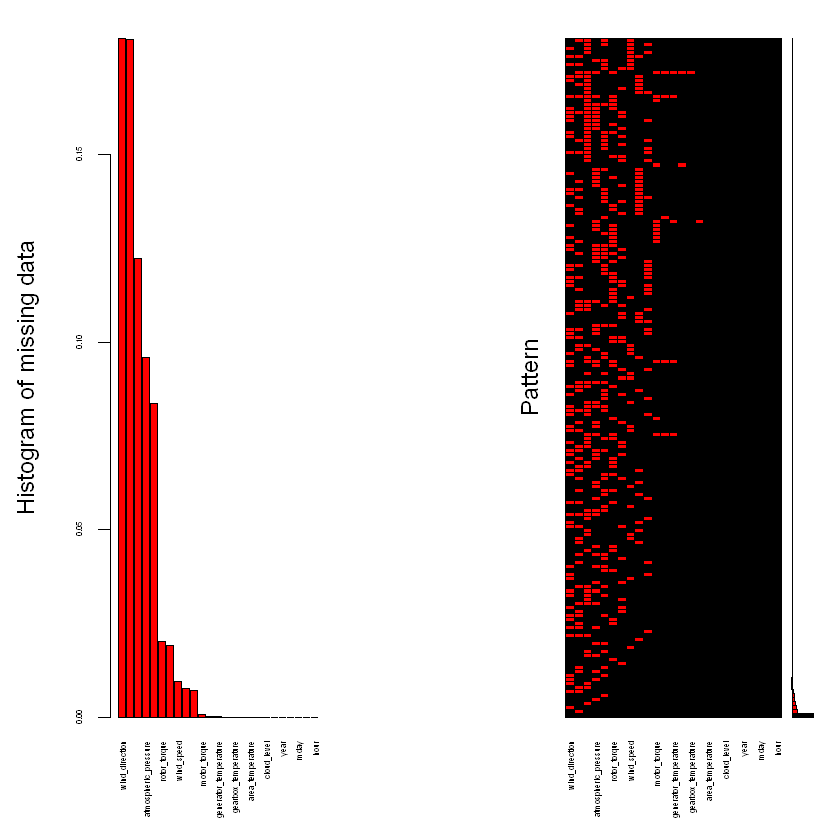

In [13]:
# Missing Values Pattern
aggr_plot <- aggr(wind.dt, col=c('black','red'), 
                  numbers=TRUE, sortVars=TRUE, labels=names(data), 
                  cex.axis=0.4, gap=10, ylab=c("Histogram of missing data","Pattern"))

## <a id='section2'>3. Data Imputation</a>

In [14]:
# Data imputation with MICE stochastic regression imputation
library(mice)

trainset[trainset == ""] <- NA # account for "" as NA
testset[testset == ""] <- NA

data_imputation = function(data)
{
  # Imputing Numeric missing data using MICE stochastic regression imputation
  imp = mice(data[,c(1:14,17,19:20)], method = "norm.nob", m = 5, maxit = 5)
  data1 = complete(imp,2)
  
  # Filling missing values in categorical variables using KNN imputer
  imp2 = kNN(data[,c(15,16)])
  data2 = imp2[,c(1,2)]
  
  # Concatenating all the imputed features
  data1 = cbind(data[,c(18,21:25)],data1, data2)
  
  return(data1)
}

trainset.imputation <- data_imputation(trainset)
testset.imputation <- data_imputation(testset)

Warning message:
"package 'mice' was built under R version 3.6.3"
Attaching package: 'mice'

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    cbind, rbind




 iter imp variable
  1   1  wind_speed  atmospheric_temperature  blades_angle  engine_temperature  motor_torque  generator_temperature  atmospheric_pressure  windmill_body_temperature  wind_direction  resistance  rotor_torque  blade_length  windmill_height  windmill_generated_power
  1   2  wind_speed  atmospheric_temperature  blades_angle  engine_temperature  motor_torque  generator_temperature  atmospheric_pressure  windmill_body_temperature  wind_direction  resistance  rotor_torque  blade_length  windmill_height  windmill_generated_power
  1   3  wind_speed  atmospheric_temperature  blades_angle  engine_temperature  motor_torque  generator_temperature  atmospheric_pressure  windmill_body_temperature  wind_direction  resistance  rotor_torque  blade_length  windmill_height  windmill_generated_power
  1   4  wind_speed  atmospheric_temperature  blades_angle  engine_temperature  motor_torque  generator_temperature  atmospheric_pressure  windmill_body_temperature  wind_direction  resist

In [15]:
# Check NAs
sum(is.na(trainset)) 
sum(is.na(trainset.imputation))
sum(is.na(testset))
sum(is.na(testset.imputation))

[1] 15912

[1] 0

[1] 6702

[1] 0

In [16]:
trainset.imputation$cloud_level = as.factor(trainset.imputation$cloud_level)
trainset$cloud_level = as.factor(trainset$cloud_level)
testset.imputation$cloud_level = as.factor(testset.imputation$cloud_level)
testset$cloud_level = as.factor(testset$cloud_level)

trainset.imputation$cloud_level <- droplevels(trainset.imputation$cloud_level) # removes unused "" level
trainset$cloud_level <- droplevels(trainset$cloud_level) # removes unused "" level
testset.imputation$cloud_level <- droplevels(testset.imputation$cloud_level) # removes unused "" level
testset$cloud_level <- droplevels(testset$cloud_level) # removes unused "" level

In [17]:
summary(trainset.imputation)

 blade_breadth      year           month           mday       wday    
 Min.   :0.2001   2018: 3778   5      :2037   8      :  771   0:2644  
 1st Qu.:0.3481   2019:15962   1      :1985   22     :  757   1:2984  
 Median :0.3996                6      :1954   7      :  731   2:2925  
 Mean   :0.3979                8      :1952   17     :  728   3:2796  
 3rd Qu.:0.4504                12     :1922   6      :  712   4:2843  
 Max.   :0.5000                7      :1911   15     :  711   5:2706  
                               (Other):7979   (Other):15330   6:2842  
      hour         wind_speed      atmospheric_temperature shaft_temperature
 Min.   : 0.00   Min.   :-104.60   Min.   :-166.759        Min.   :-99.00   
 1st Qu.: 6.00   1st Qu.:  33.48   1st Qu.:   5.841        1st Qu.: 41.64   
 Median :12.00   Median :  93.59   Median :  15.567        Median : 43.67   
 Mean   :11.58   Mean   :  83.46   Mean   :   0.594        Mean   : 40.08   
 3rd Qu.:18.00   3rd Qu.:  95.60   3rd Qu.:  24

### We now have 2 sets of train/test data, one with data imputation to handle NAs and one without handling of NAs.

## <a id='section4'>4. Linear Regression</a>

In [18]:
library(car)

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

### LR Model 0
**trainset.imputation, selected time data (no year)**

In [19]:
# Develop model on trainset.imputation, including selected time data
m0 <- lm(windmill_generated_power ~ . - year, data = trainset.imputation)
summary(m0)


Call:
lm(formula = windmill_generated_power ~ . - year, data = trainset.imputation)

Residuals:
   Min     1Q Median     3Q    Max 
-7.500 -1.160 -0.116  1.013 13.892 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                3.002e+00  2.246e-01  13.364  < 2e-16 ***
blade_breadth              5.648e-01  2.115e-01   2.670 0.007583 ** 
month2                    -2.075e-01  5.724e-02  -3.625 0.000290 ***
month3                    -2.208e+00  6.204e-02 -35.592  < 2e-16 ***
month4                    -3.192e+00  7.002e-02 -45.586  < 2e-16 ***
month5                    -2.125e+00  6.356e-02 -33.428  < 2e-16 ***
month6                    -1.372e+00  6.672e-02 -20.558  < 2e-16 ***
month7                    -1.639e+00  6.302e-02 -26.002  < 2e-16 ***
month8                    -2.011e+00  6.027e-02 -33.373  < 2e-16 ***
month9                    -2.322e+00  6.296e-02 -36.877  < 2e-16 ***
month10                   -1.782e+00  1.429e-01 -12.474  

In [20]:
# Residuals = Error = Actual mpg - Model Predicted mpg
RMSE.m0.train.imputation <- sqrt(mean(residuals(m0)^2))  # RMSE on trainset based on m5 model.
print(RMSE.m0.train.imputation)
summary(abs(residuals(m0)))  # Check Min Abs Error and Max Abs Error.

[1] 1.752639


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000028  0.510760  1.095376  1.347581  1.886163 13.892165 

In [21]:
# Apply model from trainset to predict on testset.
predict.m0.test.imputation <- predict(m0, newdata = testset.imputation)
testset.imputation.error <- testset.imputation$windmill_generated_power - predict.m0.test.imputation

# Testset Errors
RMSE.m0.test.imputation <- sqrt(mean(testset.imputation.error^2))
print(RMSE.m0.test.imputation)
summary(abs(testset.imputation.error))

[1] 1.739687


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000377  0.515979  1.076284  1.337095  1.887124 14.671717 

In [22]:
# Check for multicollinearity
vif(m0)

,GVIF,Df,GVIF^(1/(2*Df))
blade_breadth,1.074788,1,1.036720
month,3.825566,11,1.062885
mday,1.769351,30,1.009556
wday,1.284916,6,1.021111
hour,1.124521,1,1.060434
wind_speed,1.299219,1,1.139833
atmospheric_temperature,1.022965,1,1.011417
shaft_temperature,1.047704,1,1.023574
blades_angle,1.108931,1,1.053058
gearbox_temperature,1.022379,1,1.011128


### LR Model 1
**trainset.imputation, no time data**

In [23]:
# Develop model on trainset.imputation, excluding time data
m1 <- lm(windmill_generated_power ~ . - year - mday - wday - month - hour, data = trainset.imputation)
summary(m1)


Call:
lm(formula = windmill_generated_power ~ . - year - mday - wday - 
    month - hour, data = trainset.imputation)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8619 -1.3525 -0.2062  1.1338 16.1164 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -3.872e-01  2.116e-01  -1.830 0.067252 .  
blade_breadth              5.973e-01  2.419e-01   2.469 0.013558 *  
wind_speed                -3.656e-03  2.719e-04 -13.447  < 2e-16 ***
atmospheric_temperature   -2.202e-03  3.263e-04  -6.749 1.53e-11 ***
shaft_temperature         -1.021e-03  5.415e-04  -1.886 0.059338 .  
blades_angle              -2.668e-04  3.129e-04  -0.852 0.393972    
gearbox_temperature        8.355e-04  3.345e-04   2.498 0.012500 *  
engine_temperature         3.293e-02  2.658e-03  12.388  < 2e-16 ***
motor_torque               3.309e-03  5.216e-05  63.429  < 2e-16 ***
generator_temperature     -9.603e-02  2.313e-03 -41.517  < 2e-16 ***
atmospheric_p

In [24]:
# Residuals = Error = Actual mpg - Model Predicted mpg
RMSE.m1.train.imputation <- sqrt(mean(residuals(m1)^2))  # RMSE on trainset based on m5 model.
print(RMSE.m1.train.imputation)
summary(abs(residuals(m1)))  # Check Min Abs Error and Max Abs Error.

[1] 2.009459


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000047  0.585652  1.264249  1.547285  2.187390 16.116403 

In [25]:
# Apply model from trainset to predict on testset.
predict.m1.test.imputation <- predict(m1, newdata = testset.imputation)
testset.imputation.error <- testset.imputation$windmill_generated_power - predict.m1.test.imputation

# Testset Errors
RMSE.m1.test.imputation <- sqrt(mean(testset.imputation.error^2))
print(RMSE.m1.test.imputation)
summary(abs(testset.imputation.error))

[1] 1.999656


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000392  0.592842  1.254243  1.542016  2.169462 13.509303 

In [26]:
# Check for multicollinearity
vif(m1)

,GVIF,Df,GVIF^(1/(2*Df))
blade_breadth,1.072399,1,1.035567
wind_speed,1.290369,1,1.135944
atmospheric_temperature,1.018249,1,1.009083
shaft_temperature,1.045351,1,1.022424
blades_angle,1.101361,1,1.049458
gearbox_temperature,1.020124,1,1.010012
engine_temperature,1.269425,1,1.126688
motor_torque,9.104936,1,3.017439
generator_temperature,10.291833,1,3.208089
atmospheric_pressure,1.063960,1,1.031484


### LR Model 2
**trainset (drop NA), selected time data (no year)**

In [27]:
# Develop model on trainset, including time data, but dropping NA values
nrow(trainset)
sum(is.na(trainset))

trainset.drop <- trainset[complete.cases(trainset), ]
testset.drop <- testset[complete.cases(testset), ]

nrow(trainset.drop)
sum(is.na(trainset.drop))

m2 <- lm(windmill_generated_power ~ . - year, data = trainset.drop)
summary(m2)

[1] 19740

[1] 15912

[1] 8314

[1] 0


Call:
lm(formula = windmill_generated_power ~ . - year, data = trainset.drop)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2085 -1.1068 -0.1260  0.9608 13.8764 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                3.581e+00  3.276e-01  10.931  < 2e-16 ***
wind_speed                -2.308e-03  3.504e-04  -6.587 4.78e-11 ***
atmospheric_temperature   -1.796e-03  4.267e-04  -4.208 2.60e-05 ***
shaft_temperature         -3.240e-04  6.905e-04  -0.469 0.638941    
blades_angle              -2.839e-04  4.041e-04  -0.702 0.482417    
gearbox_temperature        9.842e-04  4.308e-04   2.284 0.022372 *  
engine_temperature         1.868e-02  3.478e-03   5.373 7.97e-08 ***
motor_torque               2.922e-03  6.871e-05  42.518  < 2e-16 ***
generator_temperature     -8.982e-02  3.092e-03 -29.047  < 2e-16 ***
atmospheric_pressure       6.142e-07  1.044e-07   5.880 4.26e-09 ***
area_temperature           7.016e-02  3.657e-03  19.1

In [28]:
# Residuals = Error = Actual mpg - Model Predicted mpg
RMSE.m2.train.drop <- sqrt(mean(residuals(m2)^2))  # RMSE on trainset based on m5 model.
print(RMSE.m2.train.drop)
summary(abs(residuals(m2)))  # Check Min Abs Error and Max Abs Error.

[1] 1.694834


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000134  0.478445  1.049827  1.292497  1.800168 13.876402 

In [29]:
# Apply model from trainset to predict on testset.
predict.m2.test.drop <- predict(m2, newdata = testset.drop)
testset.error <- testset.drop$windmill_generated_power - predict.m2.test.drop

# Testset Errors
RMSE.m2.test.drop <- sqrt(mean(testset.error^2))
print(RMSE.m2.test.drop)
summary(abs(testset.imputation.error))

[1] 1.723929


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000392  0.592842  1.254243  1.542016  2.169462 13.509303 

In [30]:
# Check for multicollinearity
vif(m2)

,GVIF,Df,GVIF^(1/(2*Df))
wind_speed,1.305588,1,1.142623
atmospheric_temperature,1.027145,1,1.013482
shaft_temperature,1.050581,1,1.024979
blades_angle,1.129904,1,1.062970
gearbox_temperature,1.032737,1,1.016237
engine_temperature,1.311747,1,1.145315
motor_torque,8.920015,1,2.986639
generator_temperature,10.335871,1,3.214945
atmospheric_pressure,1.085609,1,1.041925
area_temperature,2.189072,1,1.479551


### LR Model 3
**trainset.imputation, no time data, high VIF removed (motor_torque, generator_temperature)**

In [31]:
# Develop model on trainset.imputation, excluding time data and factors with high VIF
# high VIF: motor_torque, generator_temperature
m3 <- lm(windmill_generated_power ~ . 
         - year 
         - mday 
         - wday 
         - month 
         - hour 
         - motor_torque 
         - generator_temperature, data = trainset.imputation)
summary(m3)


Call:
lm(formula = windmill_generated_power ~ . - year - mday - wday - 
    month - hour - motor_torque - generator_temperature, data = trainset.imputation)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7439 -1.5926 -0.0032  1.4328 15.2766 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -5.306e+00  2.215e-01 -23.958  < 2e-16 ***
blade_breadth              1.370e+00  2.698e-01   5.078 3.84e-07 ***
wind_speed                -2.365e-03  2.834e-04  -8.347  < 2e-16 ***
atmospheric_temperature   -2.446e-03  3.633e-04  -6.733 1.71e-11 ***
shaft_temperature         -9.683e-04  6.046e-04  -1.602  0.10926    
blades_angle              -5.197e-03  3.380e-04 -15.377  < 2e-16 ***
gearbox_temperature        7.516e-04  3.734e-04   2.013  0.04416 *  
engine_temperature         5.192e-02  2.926e-03  17.744  < 2e-16 ***
atmospheric_pressure       6.173e-07  8.664e-08   7.124 1.08e-12 ***
area_temperature           8.523e-02  2.327

In [32]:
# Residuals = Error = Actual mpg - Model Predicted mpg
RMSE.m3.train.imputation <- sqrt(mean(residuals(m3)^2))  # RMSE on trainset based on m5 model.
print(RMSE.m3.train.imputation)
summary(abs(residuals(m3)))  # Check Min Abs Error and Max Abs Error.

[1] 2.243516


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000019  0.720840  1.513183  1.775070  2.499484 15.276619 

In [33]:
# Apply model from trainset to predict on testset.
predict.m3.test.imputation <- predict(m3, newdata = testset.imputation)
testset.imputation.error <- testset.imputation$windmill_generated_power - predict.m3.test.imputation

# Testset Errors
RMSE.m3.test.imputation <- sqrt(mean(testset.imputation.error^2))
print(RMSE.m3.test.imputation)
summary(abs(testset.imputation.error))

[1] 2.228306


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000533  0.713904  1.480651  1.758729  2.468340 13.766253 

In [34]:
# Check for multicollinearity
vif(m3)

,GVIF,Df,GVIF^(1/(2*Df))
blade_breadth,1.069995,1,1.034406
wind_speed,1.124737,1,1.060536
atmospheric_temperature,1.012556,1,1.006258
shaft_temperature,1.045327,1,1.022413
blades_angle,1.030802,1,1.015284
gearbox_temperature,1.020044,1,1.009972
engine_temperature,1.233968,1,1.110841
atmospheric_pressure,1.033030,1,1.016381
area_temperature,1.264168,1,1.124352
windmill_body_temperature,1.010360,1,1.005166


### LR Model 3T
**Model 3 + turbine_status removed**

In [35]:
# Develop model on m3, excluding turbine_status
m3t <- lm(windmill_generated_power ~ . 
         - year 
         - mday 
         - wday 
         - month 
         - hour 
         - motor_torque 
         - generator_temperature
         - turbine_status, data = trainset.imputation)
summary(m3t)


Call:
lm(formula = windmill_generated_power ~ . - year - mday - wday - 
    month - hour - motor_torque - generator_temperature - turbine_status, 
    data = trainset.imputation)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6047 -1.5923 -0.0028  1.4287 15.2354 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -5.418e+00  2.132e-01 -25.410  < 2e-16 ***
blade_breadth              1.365e+00  2.698e-01   5.059 4.25e-07 ***
wind_speed                -2.368e-03  2.834e-04  -8.356  < 2e-16 ***
atmospheric_temperature   -2.444e-03  3.633e-04  -6.728 1.77e-11 ***
shaft_temperature         -9.705e-04  6.046e-04  -1.605   0.1084    
blades_angle              -5.217e-03  3.380e-04 -15.433  < 2e-16 ***
gearbox_temperature        7.391e-04  3.734e-04   1.979   0.0478 *  
engine_temperature         5.178e-02  2.926e-03  17.698  < 2e-16 ***
atmospheric_pressure       6.194e-07  8.666e-08   7.147 9.16e-13 ***
area_temperature     

In [36]:
# Residuals = Error = Actual mpg - Model Predicted mpg
RMSE.m3t.train.imputation <- sqrt(mean(residuals(m3t)^2))  # RMSE on trainset based on m5 model.
print(RMSE.m3t.train.imputation)
summary(abs(residuals(m3t)))  # Check Min Abs Error and Max Abs Error.

[1] 2.244992


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000059  0.725409  1.510238  1.775521  2.497335 15.235426 

In [37]:
# Apply model from trainset to predict on testset.
predict.m3t.test.imputation <- predict(m3t, newdata = testset.imputation)
testset.imputation.error <- testset.imputation$windmill_generated_power - predict.m3t.test.imputation

# Testset Errors
RMSE.m3t.test.imputation <- sqrt(mean(testset.imputation.error^2))
print(RMSE.m3t.test.imputation)
summary(abs(testset.imputation.error))

[1] 2.225076


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000112  0.715224  1.471517  1.755933  2.468779 13.891273 

In [38]:
# Check for multicollinearity
vif(m3t)

,GVIF,Df,GVIF^(1/(2*Df))
blade_breadth,1.069465,1,1.034150
wind_speed,1.124378,1,1.060367
atmospheric_temperature,1.011960,1,1.005962
shaft_temperature,1.044687,1,1.022099
blades_angle,1.030283,1,1.015029
gearbox_temperature,1.019563,1,1.009734
engine_temperature,1.233375,1,1.110574
atmospheric_pressure,1.032815,1,1.016275
area_temperature,1.263806,1,1.124191
windmill_body_temperature,1.010060,1,1.005017


### LR Model 3P
**Model 3T + high p-value factors removed (shaft_temperature, gearbox_temperature, blade_length, windmill_height)**

In [39]:
# Develop model on m3t, excluding high p-value factors
# high p-value: shaft_temperature, gearbox_temperature, blade_length, windmill_height
m3p <- lm(windmill_generated_power ~ . 
         - year 
         - mday 
         - wday 
         - month 
         - hour 
         - motor_torque 
         - generator_temperature
         - turbine_status
         - shaft_temperature
         - gearbox_temperature
         - blade_length
         - windmill_height, data = trainset.imputation)
summary(m3p)


Call:
lm(formula = windmill_generated_power ~ . - year - mday - wday - 
    month - hour - motor_torque - generator_temperature - turbine_status - 
    shaft_temperature - gearbox_temperature - blade_length - 
    windmill_height, data = trainset.imputation)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6466 -1.5922 -0.0046  1.4309 15.2437 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -5.411e+00  2.080e-01 -26.018  < 2e-16 ***
blade_breadth              1.379e+00  2.698e-01   5.111 3.24e-07 ***
wind_speed                -2.372e-03  2.834e-04  -8.369  < 2e-16 ***
atmospheric_temperature   -2.444e-03  3.633e-04  -6.727 1.77e-11 ***
blades_angle              -5.228e-03  3.380e-04 -15.470  < 2e-16 ***
engine_temperature         5.156e-02  2.855e-03  18.058  < 2e-16 ***
atmospheric_pressure       6.187e-07  8.667e-08   7.139 9.71e-13 ***
area_temperature           8.519e-02  2.327e-03  36.614  < 2e-16 ***
windmill_b

In [40]:
# Residuals = Error = Actual mpg - Model Predicted mpg
RMSE.m3p.train.imputation <- sqrt(mean(residuals(m3p)^2))  # RMSE on trainset based on m5 model.
print(RMSE.m3p.train.imputation)
summary(abs(residuals(m3p)))  # Check Min Abs Error and Max Abs Error.

[1] 2.245393


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000151  0.726145  1.509480  1.776168  2.498416 15.243732 

In [41]:
# Apply model from trainset to predict on testset.
predict.m3p.test.imputation <- predict(m3p, newdata = testset.imputation)
testset.imputation.error <- testset.imputation$windmill_generated_power - predict.m3p.test.imputation

# Testset Errors
RMSE.m3p.test.imputation <- sqrt(mean(testset.imputation.error^2))
print(RMSE.m3p.test.imputation)
summary(abs(testset.imputation.error))

[1] 2.225634


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000408  0.712735  1.473316  1.756356  2.466985 13.894112 

In [42]:
# Check for multicollinearity
vif(m3p)

,GVIF,Df,GVIF^(1/(2*Df))
blade_breadth,1.068946,1,1.033898
wind_speed,1.124201,1,1.060284
atmospheric_temperature,1.011865,1,1.005915
blades_angle,1.029690,1,1.014737
engine_temperature,1.174390,1,1.083693
atmospheric_pressure,1.032752,1,1.016244
area_temperature,1.263070,1,1.123864
windmill_body_temperature,1.009728,1,1.004852
wind_direction,1.060835,1,1.029968
resistance,1.168515,1,1.080979


### Insights
- RMSE increases when high VIF factors are removed
- Possible justification for dropping time data is VIF (<5 but still 2-4, higher than other factors with VIF ~1)
- engine_temperature appears to be a significant factor, outlier amongst other temps (low p-value, VIF)
- blade_length and windmill_height are less significant (high p-value)

### LR Model 4
**Model 3P + manual removal of inputs that can only be observed**

In [43]:
# Develop model on m3p, excluding post-installation observations
# observations: windmill_body_temperature, rotor_torque, engine_temperature
m4 <- lm(windmill_generated_power ~ . 
         - year 
         - mday 
         - wday 
         - month 
         - hour 
         - motor_torque 
         - generator_temperature
         - turbine_status
         - shaft_temperature
         - gearbox_temperature
         - blade_length
         - windmill_height
         - windmill_body_temperature
         - rotor_torque
         - engine_temperature, data = trainset.imputation)
summary(m4)


Call:
lm(formula = windmill_generated_power ~ . - year - mday - wday - 
    month - hour - motor_torque - generator_temperature - turbine_status - 
    shaft_temperature - gearbox_temperature - blade_length - 
    windmill_height - windmill_body_temperature - rotor_torque - 
    engine_temperature, data = trainset.imputation)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0061 -1.5805  0.0159  1.4457 14.0812 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -3.959e+00  1.901e-01 -20.831  < 2e-16 ***
blade_breadth            1.460e+00  2.735e-01   5.337 9.58e-08 ***
wind_speed              -1.607e-03  2.851e-04  -5.637 1.76e-08 ***
atmospheric_temperature -2.162e-03  3.682e-04  -5.872 4.38e-09 ***
blades_angle            -5.606e-03  3.423e-04 -16.376  < 2e-16 ***
atmospheric_pressure     5.373e-07  8.777e-08   6.121 9.48e-10 ***
area_temperature         9.943e-02  2.263e-03  43.929  < 2e-16 ***
wind_direction           5

In [44]:
# Residuals = Error = Actual mpg - Model Predicted mpg
RMSE.m4.train.imputation <- sqrt(mean(residuals(m4)^2))  # RMSE on trainset based on m5 model.
print(RMSE.m4.train.imputation)
summary(abs(residuals(m4)))  # Check Min Abs Error and Max Abs Error.

[1] 2.277249


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000336  0.735364  1.511296  1.795280  2.515142 14.081182 

In [45]:
# Apply model from trainset to predict on testset.
predict.m4.test.imputation <- predict(m4, newdata = testset.imputation)
testset.imputation.error <- testset.imputation$windmill_generated_power - predict.m4.test.imputation

# Testset Errors
RMSE.m4.test.imputation <- sqrt(mean(testset.imputation.error^2))
print(RMSE.m4.test.imputation)
summary(abs(testset.imputation.error))

[1] 2.250254


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000549  0.708544  1.483762  1.769458  2.489175 12.385027 

In [46]:
# Check for multicollinearity
vif(m4)

,GVIF,Df,GVIF^(1/(2*Df))
blade_breadth,1.068593,1,1.033728
wind_speed,1.106639,1,1.051969
atmospheric_temperature,1.010519,1,1.005246
blades_angle,1.027331,1,1.013573
atmospheric_pressure,1.030052,1,1.014915
area_temperature,1.162410,1,1.078151
wind_direction,1.053237,1,1.026273
resistance,1.140529,1,1.067955
cloud_level,1.085375,2,1.020693
